# TOTA spending data

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math
import seaborn as sns

In [2]:
df = pd.read_csv('../data/spending_data.csv')

df.head(10)

,Date,ITS Spend Category Name,Origin Tourism Region,Destination Tourism Region,Spend,Destination Province,Benchmark,Origin Country,Year
0,2020-10-01,Recreation and Entertainment,Parklands,North-Eastern Ontario,0.0,Ontario,Final,Canada,2020
1,2020-12-01,Recreation and Entertainment,Parklands,North-Eastern Ontario,0.0,Ontario,Final,Canada,2020
2,2020-11-01,Recreation and Entertainment,Parklands,North-Eastern Ontario,0.0,Ontario,Final,Canada,2020
3,2019-07-01,Clothes and Gifts,Northumberland Shore,Northwest Territories,0.0,Northwest Territories,Final,Canada,2019
4,2019-08-01,Clothes and Gifts,Northumberland Shore,Northwest Territories,0.0,Northwest Territories,Final,Canada,2019
5,2019-09-01,Clothes and Gifts,Northumberland Shore,Northwest Territories,0.0,Northwest Territories,Final,Canada,2019
6,2020-07-01,Clothes and Gifts,South-Western Ontario,Eastern Shore,0.0,Nova Scotia,Final,Canada,2020
7,2020-09-01,Clothes and Gifts,South-Western Ontario,Eastern Shore,0.0,Nova Scotia,Final,Canada,2020
8,2020-08-01,Clothes and Gifts,South-Western Ontario,Eastern Shore,0.0,Nova Scotia,Final,Canada,2020
9,2021-02-01,Accommodation,Other Sea to Sky - Sunshine Coast,Northumberland Shore,0.0,Nova Scotia,Preliminary,Canada,2021


In [5]:
df['Destination Province'].unique()

array(['Ontario', 'Northwest Territories', 'Nova Scotia', 'Manitoba',
       'British Columbia', 'Quebec', 'New Brunswick', 'Yukon', 'Nunavut',
       'Alberta', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Saskatchewan'], dtype=object)

In [11]:
df[df['Destination Province'] == 'British Columbia'].groupby(['Origin Country', 'Year'])['Spend'].sum().reset_index()

,Origin Country,Year,Spend
0,Australia,2018,3.844380e+08
1,Australia,2019,3.761490e+08
2,Australia,2020,9.406476e+07
3,Australia,2021,2.607888e+07
4,Canada,2018,1.018748e+10
5,Canada,2019,1.015109e+10
6,Canada,2020,6.830266e+09
7,Canada,2021,6.457845e+09
8,China,2018,8.468020e+08
9,China,2019,7.487100e+08


In [28]:
origin='United States'
year=2019

df_plt = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == year) & (df['Origin Country'] == origin)].\
groupby(['Origin Country', 'Date', 'ITS Spend Category Name'])['Spend'].sum().reset_index()
df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
df_plt.head(10)

,Origin Country,Date,ITS Spend Category Name,Spend,Month
0,United States,2019-01-01,Accommodation,6.185382e+07,1
1,United States,2019-01-01,Clothes and Gifts,7.987316e+06,1
2,United States,2019-01-01,Food and Beverage,3.747555e+07,1
3,United States,2019-01-01,"Others (Souvenirs, Shopping, Etc.)",2.299823e+06,1
4,United States,2019-01-01,Recreation and Entertainment,1.714351e+07,1
5,United States,2019-01-01,Transportation,1.401231e+07,1
6,United States,2019-02-01,Accommodation,5.826578e+07,2
7,United States,2019-02-01,Clothes and Gifts,6.922279e+06,2
8,United States,2019-02-01,Food and Beverage,3.872815e+07,2
9,United States,2019-02-01,"Others (Souvenirs, Shopping, Etc.)",2.103764e+06,2


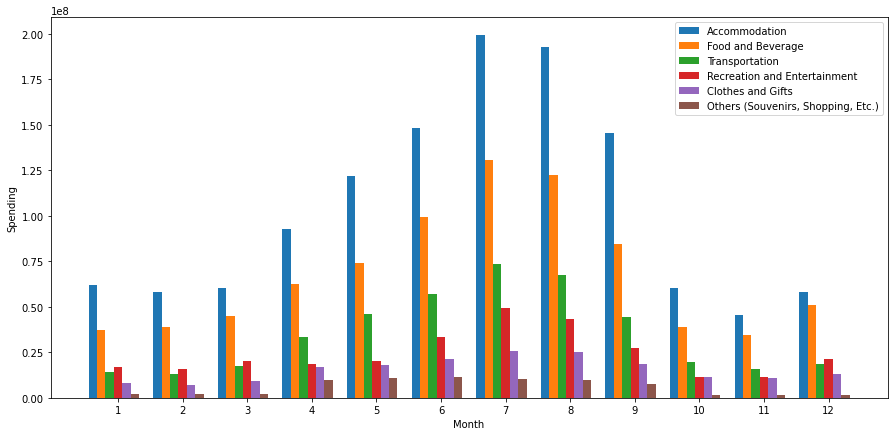

In [48]:
fig=plt.figure(figsize=(15,7))

wd = 0.13
pos = wd*-3
#cat=df_plt['ITS Spend Category Name'].unique()
cat = ['Accommodation', 'Food and Beverage','Transportation',\
       'Recreation and Entertainment', 'Clothes and Gifts', 'Others (Souvenirs, Shopping, Etc.)']


for i in range(len(cat)):
    df_ax = df_plt[df_plt['ITS Spend Category Name'] == cat[i]]
    
    plt.bar(df_ax['Month']+pos, df_ax['Spend'], wd)
    pos = pos+wd
    
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Spending")
plt.legend(cat)
plt.show()



In [62]:
def plot_spending(df, origin, year):

    df_plt = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == year) & (df['Origin Country'] == origin)].\
    groupby(['Origin Country', 'Date', 'ITS Spend Category Name'])['Spend'].sum().reset_index()
    df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
    
    fig=plt.figure(figsize=(15,7))
    
    #max_val = df['Spend'].max()+(df['Spend'].max()*0.1)
    max_val = 200000000
    
    wd = 0.13
    pos = wd*-3
    #cat=df_plt['ITS Spend Category Name'].unique()
    cat = ['Accommodation', 'Food and Beverage','Transportation',\
           'Recreation and Entertainment', 'Clothes and Gifts', 'Others (Souvenirs, Shopping, Etc.)']
    
    
    for i in range(len(cat)):
        df_ax = df_plt[df_plt['ITS Spend Category Name'] == cat[i]]
        
        plt.bar(df_ax['Month']+pos, df_ax['Spend'], wd)
        plt.ylim((0, max_val*1.1))
        pos = pos+wd
        
    plt.xticks(range(1,13))
    plt.xlabel("Month")
    plt.ylabel("Spending")
    plt.legend(cat)
    plt.show()

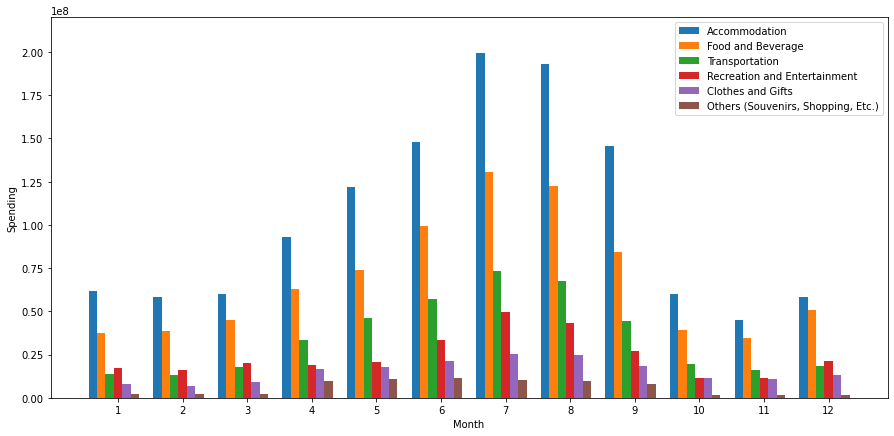

In [63]:
origin='United States'
year=2019
plot_spending(df, origin, year)

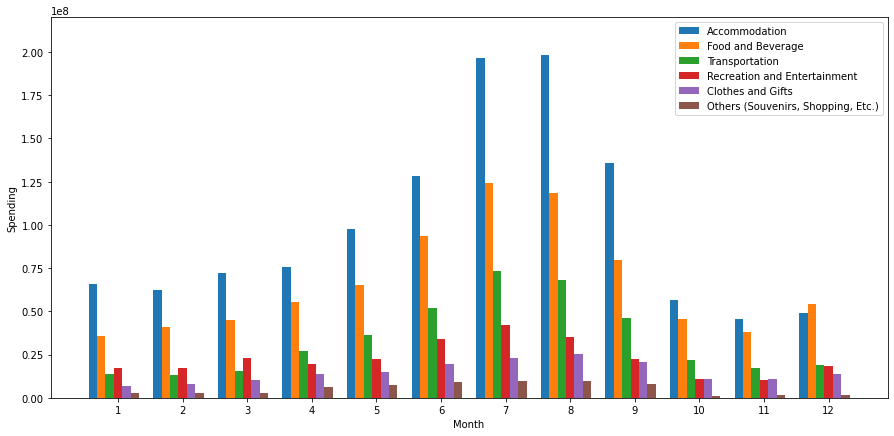

In [65]:
origin='United States'
year=2018
plot_spending(df, origin, year)